## Model Comparison - Limited Feature Set

Author: Daniel Hui

License: MIT

This notebook exaluates a few different modelling options for the data, for comparison

In [1]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Load Dataset

In [3]:
checkout_target_df = pd.read_csv('01_Data/Features_Target.csv',index_col=0)

In [4]:
checkout_target_df.head(3)

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,page,dim,avg_rating,tot_ratings,tot_reviews,cntry_code 0,cntry_code 1,cntry_code 2,cntry_code 3,cntry_code 4,pub_code 2,pub_code 3,pub_code 4,pub_code 5,pub_code 6,pub_code 7
0,3161651,0,1,1,2016,0,0,1,0,0,0,0,0,0,0,0,185,21,3.7000,4,1,0,1,0,0,0,0,0,0,1,0,0
1,3203068,0,1,1,2012,1,0,0,0,0,0,0,0,0,0,0,269,22,0.0000,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2851182,0,1,1,2013,0,0,1,0,0,0,1,0,0,0,0,24,26,0.0000,0,0,0,1,0,0,0,0,0,0,1,0,0


In [5]:
checkout_target_df.describe()

,BibNum,Checkout,Title,ISBN,Year,Fiction,Language,Nonfiction,Biography,Large Print,Picture,Children,Teen,Mystery,AfAm,Comic,page,dim,avg_rating,tot_ratings,tot_reviews,cntry_code 0,cntry_code 1,cntry_code 2,cntry_code 3,cntry_code 4,pub_code 2,pub_code 3,pub_code 4,pub_code 5,pub_code 6,pub_code 7
count,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000,27211.0000
mean,2249489.5370,0.4882,1.0000,0.8745,2001.7685,0.2818,0.0785,0.6339,0.0366,0.0208,0.0398,0.1598,0.0489,0.0244,0.0188,0.0334,253.6456,23.5568,3.4695,11.9267,1.0391,0.4745,0.2916,0.0024,0.0045,0.0060,0.0800,0.2241,0.2409,0.1810,0.0415,0.0119
std,948991.6013,0.4999,0.0000,0.3313,16.7969,0.4499,0.2689,0.4817,0.1878,0.1428,0.1954,0.3665,0.2157,0.1543,0.1357,0.1797,143.0197,3.4577,3.8609,71.7034,6.8293,0.4994,0.4545,0.0484,0.0671,0.0772,0.2714,0.4170,0.4276,0.3850,0.1994,0.1083
min,75.0000,0.0000,1.0000,0.0000,1877.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1877301.0000,0.0000,1.0000,1.0000,1997.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,176.0000,22.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2566955.0000,0.0000,1.0000,1.0000,2008.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,253.0000,23.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,2969785.5000,1.0000,1.0000,1.0000,2013.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,306.0000,24.0000,7.5000,5.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,3342152.0000,1.0000,1.0000,1.0000,2018.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3078.0000,283.0000,10.0000,3552.0000,389.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
checkout_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27211 entries, 0 to 27210
Data columns (total 32 columns):
BibNum          27211 non-null int64
Checkout        27211 non-null int64
Title           27211 non-null int64
ISBN            27211 non-null int64
Year            27211 non-null int64
Fiction         27211 non-null int64
Language        27211 non-null int64
Nonfiction      27211 non-null int64
Biography       27211 non-null int64
Large Print     27211 non-null int64
Picture         27211 non-null int64
Children        27211 non-null int64
Teen            27211 non-null int64
Mystery         27211 non-null int64
AfAm            27211 non-null int64
Comic           27211 non-null int64
page            27211 non-null int64
dim             27211 non-null int64
avg_rating      27211 non-null float64
tot_ratings     27211 non-null int64
tot_reviews     27211 non-null int64
cntry_code 0    27211 non-null int64
cntry_code 1    27211 non-null int64
cntry_code 2    27211 non-null int64
c

In [7]:
len(checkout_target_df)

27211

### Train / Test / Split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [9]:
y = checkout_target_df["Checkout"]
X = checkout_target_df.drop(["Checkout","BibNum"],axis=1)

#hold out portion of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) #keep at 20 to be consistent

#hold out 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=50) 

In [10]:
print(len(X_train),len(X_val),len(X_test))

16326 5442 5443


### KNN Classifier
This first part will grid search for the best Neighbor value

In [11]:
for i in range(5,31,5):
    adjacents = i
    knn = KNeighborsClassifier(n_neighbors=adjacents)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    print(adjacents, " neighbors. Accuracy: ", metrics.accuracy_score(y_val, y_pred))
    print(adjacents, " neighbors. Precision: ", metrics.precision_score(y_val, y_pred))
    print(adjacents, " neighbors. Recall: ", metrics.recall_score(y_val, y_pred))
    print(adjacents, " neighbors. f1: ", metrics.f1_score(y_val, y_pred))  
    print("----------")

5  neighbors. Accuracy:  0.7177508269018743
5  neighbors. Precision:  0.7014817491868449
5  neighbors. Recall:  0.7321765371557902
5  neighbors. f1:  0.7165005537098559
----------
10  neighbors. Accuracy:  0.7381477398015436
10  neighbors. Precision:  0.7432539682539683
10  neighbors. Recall:  0.7065258393059223
10  neighbors. f1:  0.724424676078128
----------
15  neighbors. Accuracy:  0.7454979786843072
15  neighbors. Precision:  0.7334070796460177
15  neighbors. Recall:  0.7502829121086383
15  neighbors. f1:  0.7417490210702964
----------
20  neighbors. Accuracy:  0.7454979786843072
20  neighbors. Precision:  0.7461119751166407
20  neighbors. Recall:  0.7238777819690683
20  neighbors. f1:  0.7348267279341375
----------
25  neighbors. Accuracy:  0.7456817346563763
25  neighbors. Precision:  0.7362924281984334
25  neighbors. Recall:  0.7446246699358733
25  neighbors. f1:  0.7404351087771943
----------
30  neighbors. Accuracy:  0.7443954428518927
30  neighbors. Precision:  0.74513618677

In [12]:
# Let's go with N=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

In [14]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_pred))
print("Precision: ",metrics.precision_score(y_val, y_pred))
print("Recall: ",metrics.recall_score(y_val, y_pred))
print("F1: ",metrics.f1_score(y_val, y_pred))

Accuracy:  0.7454979786843072
Precision:  0.7334070796460177
Recall:  0.7502829121086383
F1:  0.7417490210702964


In [15]:
confusion_matrix(y_val, y_pred)

array([[2068,  723],
       [ 662, 1989]])

### Logistic Regression

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [17]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
lr_model = LogisticRegression(C=10000)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_train_pred = lr_model.predict(X_train_scaled)

In [20]:
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))
print("Precision: ",metrics.precision_score(y_train, y_train_pred))
print("Recall: ",metrics.recall_score(y_train, y_train_pred))
print("F1: ",metrics.f1_score(y_train, y_train_pred))

Accuracy:  0.7391890236432684
Precision:  0.7384654928672407
Recall:  0.7210440456769984
F1:  0.7296507936507938


In [21]:
X_val_scaled = std_scale.transform(X_val)
y_val_pred = lr_model.predict(X_val_scaled)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [22]:
print("Accuracy: ",metrics.accuracy_score(y_val, y_val_pred))
print("Precision: ",metrics.precision_score(y_val, y_val_pred))
print("Recall: ",metrics.recall_score(y_val, y_val_pred))
print("F1: ",metrics.f1_score(y_val, y_val_pred))

Accuracy:  0.7442116868798236
Precision:  0.7355031799476244
Recall:  0.7416069407770652
F1:  0.738542449286251


In [23]:
confusion_matrix(y_val, y_val_pred)

array([[2084,  707],
       [ 685, 1966]])

In [24]:
coefficients = lr_model.coef_[0] * -1
features = np.array(X_train.columns)

In [25]:
lr_model_dict = list(zip(features,coefficients))

<BarContainer object of 30 artists>

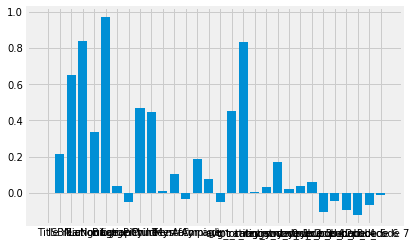

In [26]:
plt.bar(features,coefficients)

In [27]:
pd.DataFrame(lr_model_dict).sort_values(by=1,ascending=False).head(20)

,0,1
5,Nonfiction,0.9731
3,Fiction,0.8409
17,tot_ratings,0.8352
2,Year,0.6490
8,Picture,0.4672
16,avg_rating,0.4524
9,Children,0.4473
4,Language,0.3367
1,ISBN,0.2137
13,Comic,0.1866


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


Logistic Regression Model best F1 score 0.872 at prob decision threshold >= 0.790


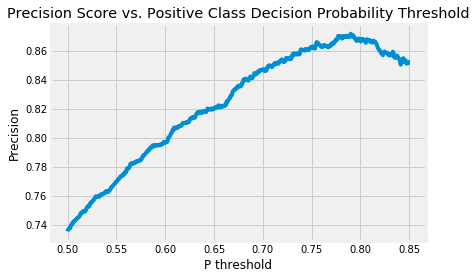

In [28]:
X_val_scaled = std_scale.transform(X_val)

thresh_ps = np.linspace(.50,.85,1000)
model_val_probs = lr_model.predict_proba(X_val_scaled)[:,1]   # first column is the probability for 0 condition
                                                              # second column is the probability for the 1 condition
precision_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    precision_scores.append(precision_score(y_val,model_val_labels))
    
plt.plot(thresh_ps, precision_scores)
plt.title('Precision Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('Precision')

best_precision_score = np.max(precision_scores) 
best_thresh_p = thresh_ps[np.argmax(precision_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_precision_score, best_thresh_p)) 


### Naive Bayes

In [32]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [31]:
model = naive_bayes.GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
y_train_predict = model.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Recall: ",recall_score(y_train,y_train_predict))         # Recall
print("Precision: ",precision_score(y_train,y_train_predict))   # Precision
print("f1: ",f1_score(y_train,y_train_predict))  

Accuracy:  0.6433909102045816
Recall:  0.8829213201154473
Precision:  0.590020964360587
f1:  0.7073489494319894


In [33]:
y_val_predict = model.predict(X_val)

In [34]:
print("Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Recall: ",recall_score(y_val,y_val_predict))         # Recall
print("Precision: ",precision_score(y_val,y_val_predict))   # Precision
print("f1: ",f1_score(y_val,y_val_predict))  

Accuracy:  0.6418596104373392
Recall:  0.8857035081101471
Precision:  0.5878818227341012
f1:  0.7066967644845747


In [36]:
confusion_matrix(y_train, model.predict(X_train) )

array([[3468, 4889],
       [ 933, 7036]])

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [30]:
# Try with different max features
rfmodel = RandomForestClassifier(n_estimators = 1000, max_features = 7,
                                min_samples_leaf = 4, n_jobs=4, max_depth=6)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_train_predict = rfmodel.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.7546245252970721
Train Recall:  0.6972016564186222
Train Precision:  0.7771716323961393
Train f1:  0.7350178595052257


In [34]:
y_val_predict = rfmodel.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict))  

Validation Accuracy:  0.7532157295112091
Validation Recall:  0.7091663523198793
Validation Precision:  0.766721044045677
Validation f1:  0.7368214775622184


In [41]:
confusion_matrix(y_val, y_val_predict)

array([[2198,  593],
       [ 737, 1914]])

### GradientBoostingClassifier

In [35]:
# Try with different max features
gbmodel = GradientBoostingClassifier(n_estimators = 1000, max_features = 3,
                                min_samples_leaf = 10,learning_rate=0.005)
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [36]:
y_train_predict = gbmodel.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.7507043978929315
Train Recall:  0.7367298280838248
Train Precision:  0.7485655998979982
Train f1:  0.7426005565393372


In [37]:
y_val_predict = gbmodel.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.7576258728408674
Validation Recall:  0.7597133157299132
Validation Precision:  0.7470326409495549
Validation f1:  0.7533196184776509


In [137]:
confusion_matrix(y_val, y_val_predict)

array([[2172,  619],
       [ 410, 2241]])

### XGBoost Classifier

In [38]:
import xgboost as xgb

In [39]:
gbm = xgb.XGBClassifier( 
                        n_estimators=40000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.15, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

# accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

In [40]:
y_train_predict = fit_model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_predict ))
print("Train Recall: ",recall_score(y_train, y_train_predict))         # Recall
print("Train Precision: ",precision_score(y_train, y_train_predict))   # Precision
print("Train f1: ",f1_score(y_train, y_train_predict)) 

Train Accuracy:  0.7633835599656988
Train Recall:  0.7555527669720166
Train Precision:  0.7586945564516129
Train f1:  0.7571204023891859


In [41]:
y_val_predict = fit_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_predict ))
print("Validation Recall: ",recall_score(y_val, y_val_predict))         # Recall
print("Validation Precision: ",precision_score(y_val, y_val_predict))   # Precision
print("Validation f1: ",f1_score(y_val, y_val_predict)) 

Validation Accuracy:  0.7699375229694965
Validation Recall:  0.7744247453791022
Validation Precision:  0.7584041374214998
Validation f1:  0.7663307204180665


In [49]:
confusion_matrix(y_val, y_val_predict)

array([[2140,  651],
       [ 603, 2048]])

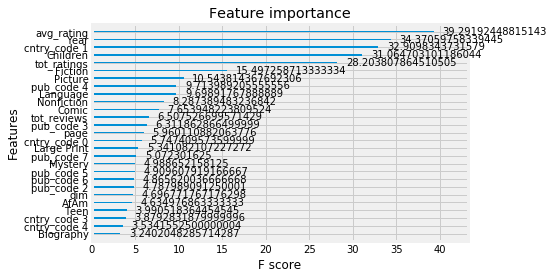

In [62]:
xgb.plot_importance(gbm, importance_type='gain')

### Neural Network

In [42]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Dropout

'''
 In this network structure, note that we follow a very common heuristic of "funneling"
 to lower dimensional representations over time with multiple layers. Tuning the exact
 choice of number of nodes and layers is quite challenging and there aren't generically
 correct choices, but this heuristic often works pretty well.
'''

NN = Sequential()

NN.add(Dense(30, input_dim = 30)) # need feature input dim (30 features) for first hidden layer
NN.add(Activation('sigmoid'))

NN.add(Dense(62))
NN.add(Activation('sigmoid'))

#NN.add(Dropout(0.01))

NN.add(Dense(124))
NN.add(Activation('sigmoid'))

NN.add(Dense(62))
NN.add(Activation('sigmoid'))

#NN.add(Dropout(0.01))

NN.add(Dense(32))
NN.add(Activation('sigmoid'))

NN.add(Dense(16))
NN.add(Activation('sigmoid'))

NN.add(Dense(1))
NN.add(Activation('sigmoid'))

NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])   #adam  #RMSProp
NN.fit(X_train, y_train, epochs=100, batch_size=500, verbose=1) # track progress as we fit

Using TensorFlow backend.


Epoch 1/100
16326/16326 [==============================] - 1s 33us/step - loss: 0.6942 - acc: 0.5040
Epoch 2/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6929 - acc: 0.5119
Epoch 3/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6931 - acc: 0.5034
Epoch 4/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6929 - acc: 0.5119
Epoch 5/100
16326/16326 [==============================] - 0s 9us/step - loss: 0.6929 - acc: 0.5119
Epoch 6/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6927 - acc: 0.5153
Epoch 7/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6916 - acc: 0.5281
Epoch 8/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6797 - acc: 0.6069
Epoch 9/100
16326/16326 [==============================] - 0s 6us/step - loss: 0.6215 - acc: 0.6893
Epoch 10/100
16326/16326 [==============================] - 0s 5us/step - loss: 0.6024 - acc: 0.689

In [43]:
from sklearn.metrics import accuracy_score

y_train_pred = NN.predict_classes(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train F1: ", f1_score(y_train, y_train_pred))
print("-------------")
y_val_pred = NN.predict_classes(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print("Validation F1: ", f1_score(y_val, y_val_pred))

Train Accuracy:  0.7252235697660174
Train F1:  0.7104311902917634
-------------
Validation Accuracy:  0.735023888276369
Validation F1:  0.7257512362114873
